In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(training_labels)

print(len(training_labels_final))
print(len(testing_labels_final))

25000
25000


In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences) # sees what actually is the most popular word
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [6]:
# reverse the toeknized values back into keys(words)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("\n")
print(decode_review(padded[0]))
print("\n")
print(training_sentences[0])




? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it


b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The mos

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs = num_epochs, validation_data=(testing_padded, testing_labels_final), verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 215us/sample - loss: 0.5105 - accuracy: 0.7254 - val_loss: 1.2752 - val_accuracy: 0.5013
Epoch 2/10
25000/25000 [==============================] - 5s 183us/sample - loss: 0.2457 - accuracy: 0.9050 - val_loss: 1.4996 - val_accuracy: 0.4996
Epoch 3/10
25000/25000 [==============================] - 5s 181us/sample - loss: 0.0960 - accuracy: 0.9756 - val_loss: 1.9692 - val_accuracy: 0.5010
Epoch 4/10
25000/25000 [==============================] - 5s 181us/sample - loss: 0.0250 - accuracy: 0.9961 - val_loss: 2.4780 - val_accuracy: 0.5003
Epoch 5/10
25000/25000 [==============================] - 5s 182us/sample - loss: 0.0058 - accuracy: 0.9997 - val_loss: 2.9078 - val_accuracy: 0.4997
Epoch 6/10
25000/25000 [==============================] - 5s 183us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.2904 - val_accuracy: 0.5003
Epoch 7/10
25000/25000 [==========================

In [17]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [24]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weight[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [1]:
# sarcasm data

In [15]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
padding_type = 'post'
trunc_type ='post'
oov_tok = "<OOV>"
training_size = 20000

In [17]:
import urllib.request, json

website = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json'

with urllib.request.urlopen(website) as url:
    data = json.loads(url.read().decode())
    
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [18]:
print(len(sentences))

training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

26709


In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
# builiding word index
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=[testing_padded, testing_labels],verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 4s 204us/sample - loss: 0.6631 - accuracy: 0.5867 - val_loss: 0.5709 - val_accuracy: 0.6687
Epoch 2/30
20000/20000 [==============================] - 3s 129us/sample - loss: 0.4215 - accuracy: 0.8346 - val_loss: 0.3808 - val_accuracy: 0.8439
Epoch 3/30
20000/20000 [==============================] - 2s 122us/sample - loss: 0.3069 - accuracy: 0.8791 - val_loss: 0.3649 - val_accuracy: 0.8371
Epoch 4/30
20000/20000 [==============================] - 2s 122us/sample - loss: 0.2540 - accuracy: 0.9031 - val_loss: 0.3453 - val_accuracy: 0.8536
Epoch 5/30
20000/20000 [==============================] - 3s 130us/sample - loss: 0.2200 - accuracy: 0.9155 - val_loss: 0.3507 - val_accuracy: 0.8501
Epoch 6/30
20000/20000 [==============================] - 2s 122us/sample - loss: 0.1905 - accuracy: 0.9291 - val_loss: 0.3546 - val_accuracy: 0.8550
Epoch 7/30
20000/20000 [===========================

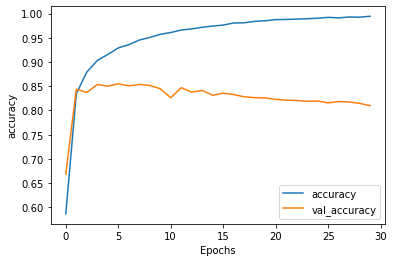

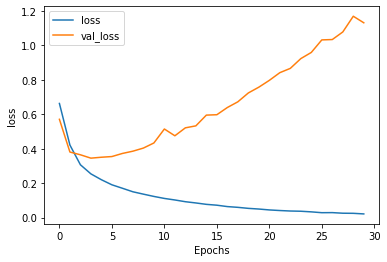

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [30]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [34]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [35]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

In [36]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.8439860e-01]
 [2.3935034e-05]]
